In [1]:
# Setup - Run first always

# Imports
import sqlite3
import tkinter as tk
from tkinter import ttk
import datetime
import statistics
import matplotlib
from matplotlib.lines import Line2D
from matplotlib.ticker import MultipleLocator

# Globals
database = 'live_golf.db'
conn = sqlite3.Connection(database)

In [ ]:
# Creation of database

# General Structure
'''
id - INT AUTOINCREMENT PRIMARY KEY (1, 2, 3, etc.)
club_abbreviation - TEXT NOT NULL (3W, PW, 3I, D, etc.)
distance - INT NOT NULL (185, 210, etc.)
course - TEXT ("Glade Valley", etc.)
shot_date - TEXT NOT NULL (2025-05-29, etc.)
hole - INT (1, 2, 3, etc.)
strike_type - TEXT ("PUSH", "PULL", "PURE")
path_type - TEXT ("HOOK", "SLICE", "PURE")
contact_type - TEXT ("THIN", "FAT", "PURE")
lie_type - TEXT ("TEE", "FAIRWAY", "ROUGH", "SAND", "FRINGE", "RECOVERY", "OTHER")
'''

# Table creation SQL Query
query = '''
CREATE TABLE IF NOT EXISTS shots (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    club_abbreviation TEXT NOT NULL,
    distance INTEGER NOT NULL,
    course TEXT,
    shot_date TEXT NOT NULL CHECK (
        shot_date GLOB '[0-9][0-9][0-9][0-9]-[0-1][0-9]-[0-3][0-9]'
    ),
    hole INTEGER,
    strike_type TEXT CHECK (
        strike_type IN ('PUSH', 'PULL', 'PURE', 'NO DATA')
    ),
    path_type TEXT CHECK (
        path_type IN ('HOOK', 'SLICE', 'PURE', 'NO DATA')
    ),
    contact_type TEXT CHECK (
        contact_type IN ('THIN', 'FAT', 'PURE', 'NO DATA')
    ),
    lie_type TEXT CHECK (
        lie_type IN ('TEE', 'FAIRWAY', 'ROUGH', 'SAND', 'FRINGE', 'RECOVERY', 'OTHER')
    )
);
'''

# Table query execution

cursor = conn.cursor()
cursor.execute(query)
conn.commit()
cursor.close()



In [ ]:
# Data entry configs - Run before data entry

# CONFIGS

clubs = ["D", "2W", "7W", "4I", "5I", "6I", "7I", "8I", "9I", "PW", "GW", "SW", "LW"] # Dropdown
course_name = "Valley Springs" # Text Box with default
date_override = None # Only use if the round wasn't today
course_hole_count = 18
distance_min = 1
distance_max = 400  

# DERIVED DON'T TOUCH

date = datetime.datetime.now().strftime("%Y-%m-%d") # fixed but displayed
if date_override: date = date_override

holes = list(range(1, course_hole_count + 1)) # dropdown

strike_types = ['PUSH', 'PULL', 'PURE']
path_types = ['HOOK', 'SLICE', 'PURE']
contact_types = ['THIN', 'FAT', 'PURE']
lie_types = ['TEE', 'FAIRWAY', 'ROUGH', 'SAND', 'FRINGE', 'RECOVERY', 'OTHER']

In [ ]:
# Actual data entry window

# GUI
root = tk.Tk()
root.title("Golf Shot Entry")

# Form Frame
frame = ttk.Frame(root, padding="10")
frame.grid(row=0, column=0, sticky=(tk.W, tk.E))

fields = {}

def add_dropdown(label, options, row, default_value=None):
    ttk.Label(frame, text=label).grid(column=0, row=row, sticky=tk.W)
    if default_value in options:
        var = tk.StringVar(value=default_value)
    else:
        var = tk.StringVar(value=options[0])
    dropdown = ttk.Combobox(frame, textvariable=var, values=options, state="readonly")
    dropdown.grid(column=1, row=row, sticky="ew")
    fields[label] = var

def add_spinbox(label, from_, to, row):
    ttk.Label(frame, text=label).grid(column=0, row=row, sticky=tk.W)
    var = tk.StringVar()
    spin = tk.Spinbox(frame, from_=from_, to=to, textvariable=var, width=5)
    spin.grid(column=1, row=row)
    fields[label] = var

def add_textbox(label, default, row, readonly=False):
    ttk.Label(frame, text=label).grid(column=0, row=row, sticky=tk.W)
    var = tk.StringVar(value=default)
    entry = ttk.Entry(frame, textvariable=var, state="readonly" if readonly else "normal")
    entry.grid(column=1, row=row)
    fields[label] = var

add_dropdown("Club", clubs, 0)
add_spinbox("Distance", distance_min, distance_max, 1)
add_textbox("Course", course_name, 2)
add_textbox("Shot Date", date, 3, readonly=True)
add_dropdown("Hole", holes, 4)
add_dropdown("Strike Type", strike_types, 5, strike_types[2])
add_dropdown("Path Type", path_types, 6, path_types[2])
add_dropdown("Contact Type", contact_types, 7, contact_types[2])
add_dropdown("Lie Type", lie_types, 8, lie_types[0])

# Submission

# id - INT AUTOINCREMENT PRIMARY KEY (1, 2, 3, etc.)
# club_abbreviation - TEXT NOT NULL (3W, PW, 3I, D, etc.)
# distance - INT NOT NULL (185, 210, etc.)
# course - TEXT ("Glade Valley", etc.)
# shot_date - TEXT NOT NULL (2025-05-29, etc.)
# hole - INT (1, 2, 3, etc.)
# strike_type - TEXT ("PUSH", "PULL", "PURE")
# path_type - TEXT ("HOOK", "SLICE", "PURE")
# contact_type - TEXT ("THIN", "FAT", "PURE")
# lie_type - TEXT ("TEE", "FAIRWAY", "ROUGH", "SAND", "FRINGE", "RECOVERY", "OTHER")

insert = '''
INSERT INTO shots (
    club_abbreviation,
    distance,
    course,
    shot_date,
    hole,
    strike_type,
    path_type,
    contact_type,
    lie_type
) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?);
'''

def submit():
    data = {k: v.get() for k, v in fields.items()}
    print("Collected Shot Data:", data)

    values = (
        data["Club"],
        int(data["Distance"]),
        data["Course"],
        data["Shot Date"],
        int(data["Hole"]),
        data["Strike Type"],
        data["Path Type"],
        data["Contact Type"],
        data["Lie Type"]
    )

    cursor = conn.cursor()
    cursor.execute(insert, values)
    conn.commit()
    cursor.close()

submit_button = ttk.Button(frame, text="Submit", command=submit)
submit_button.grid(column=0, row=9, columnspan=2, pady=10)

root.mainloop()

Collected Shot Data: {'Club': 'D', 'Distance': '220', 'Course': 'TEST_COURSE', 'Shot Date': '2025-05-20', 'Hole': '1', 'Strike Type': 'PURE', 'Path Type': 'PURE', 'Contact Type': 'PURE', 'Lie Type': 'TEE'}
Collected Shot Data: {'Club': 'D', 'Distance': '220', 'Course': 'TEST_COURSE', 'Shot Date': '2025-05-20', 'Hole': '1', 'Strike Type': 'PURE', 'Path Type': 'PURE', 'Contact Type': 'PURE', 'Lie Type': 'TEE'}


In [46]:
# Data Analysis Configs

start_date = '2025-05-20'
end_date = '2025-05-29'
bag = ["D", "2W", "7W", "4I", "5I", "6I", "7I", "8I", "9I", "PW", "GW", "SW", "LW"]
course = "TEST COURSE"
smart_start_index = 0.20 # how far off the top to trim
smart_end_index = 0.80 # How far off the bottom to trim
lie_filter = None


export_location = None


In [4]:
# Club Distance Summary

cursor = conn.cursor()

def print_(content, location=None, mode="a"):
    if location:
        with open(location, mode, encoding="utf-8") as f:
            print(content, file=f)
    else:
        print(content)

# params: (club_abbreviation, course, start_date, end_date
find_club_data = ''' 
SELECT
    club_abbreviation,
    distance,
    course,
    shot_date,
    hole,
    strike_type,
    path_type,
    contact_type,
    lie_type
FROM shots
WHERE club_abbreviation = ?
AND course = ?
AND shot_date BETWEEN ? AND ?
'''

if lie_filter:
    find_club_data += f'AND lie_type = {lie_filter}'

find_club_data += '\nORDER BY distance DESC'

data = {}

for club in bag:
    cursor.execute(find_club_data, (club, course, start_date, end_date))
    rows = cursor.fetchall() # 0 club_abbreviation, 1 distance, 2 course, 3 shot_date, 4 hole, 5 strike_type, 6 path_type, 7 contact_type, 8 lie_type
    club_data = {}
    

    # Distance data
    distances = [row[1] for row in rows]
    club_data['max_distance'] = max(distances, default=-1)
    club_data['min_distance'] = min(distances, default=-1)
    club_data['raw_average'] = sum(distances)//len(distances)

    start_idx = int(len(distances) * 0.20)
    end_idx = int(len(distances) * 0.80)
    smart_distances = distances[start_idx:end_idx]
    club_data['smart_average'] = sum(smart_distances)//len(smart_distances)

    club_data['median'] = statistics.median(distances)
    club_data['mode'] = statistics.mode(distances)
    
    strikes = [row[5] for row in rows]

    club_data['strike_breakdown'] = (strikes.count('PUSH'), strikes.count('PULL'), strikes.count('PURE'))
    club_data['strike_ratios'] = (strikes.count('PUSH')/len(strikes), strikes.count('PULL')/len(strikes), strikes.count('PURE')/len(strikes))

    paths = [row[6] for row in rows]
    club_data['path_breakdown'] = (paths.count('HOOK'), paths.count('SLICE'), paths.count('PURE'))
    club_data['path_ratios'] = (paths.count('HOOK')/len(paths), paths.count('SLICE')/len(paths), paths.count('PURE')/len(paths))

    contacts = [row[7] for row in rows]
    club_data['contact_breakdown'] = (contacts.count('THIN'), contacts.count('FAT'), contacts.count('PURE'))
    club_data['contact_ratios'] = (contacts.count('THIN')/len(contacts), contacts.count('FAT')/len(contacts), contacts.count('PURE')/len(contacts))

    data['club'] = club_data

    summary = ''

    summary += f'{club}\n'
    summary += f'Max Distance: {club_data["max_distance"]}\n'
    summary += f'Min Distance: {club_data["min_distance"]}\n'
    summary += f'Raw Average Distance: {club_data["raw_average"]}\n'
    summary += f'Smart Average Distance: {club_data["smart_average"]}\n'
    summary += f'Median Distance: {club_data["median"]}\n'
    summary += f'Mode Distance: {club_data["mode"]}\n\n'

    summary += 'Strike Breakdown (PUSH, PULL, PURE): ' + ', '.join(map(str, club_data['strike_breakdown'])) + '\n'
    summary += 'Strike Ratios (PUSH, PULL, PURE): ' + ', '.join(f'{ratio:.2%}' for ratio in club_data['strike_ratios']) + '\n\n'

    summary += 'Path Breakdown (HOOK, SLICE, PURE): ' + ', '.join(map(str, club_data['path_breakdown'])) + '\n'
    summary += 'Path Ratios (HOOK, SLICE, PURE): ' + ', '.join(f'{ratio:.2%}' for ratio in club_data['path_ratios']) + '\n\n'

    summary += 'Contact Breakdown (THIN, FAT, PURE): ' + ', '.join(map(str, club_data['contact_breakdown'])) + '\n'
    summary += 'Contact Ratios (THIN, FAT, PURE): ' + ', '.join(f'{ratio:.2%}' for ratio in club_data['contact_ratios']) + '\n'

    print_(summary, 'test_summary.txt')


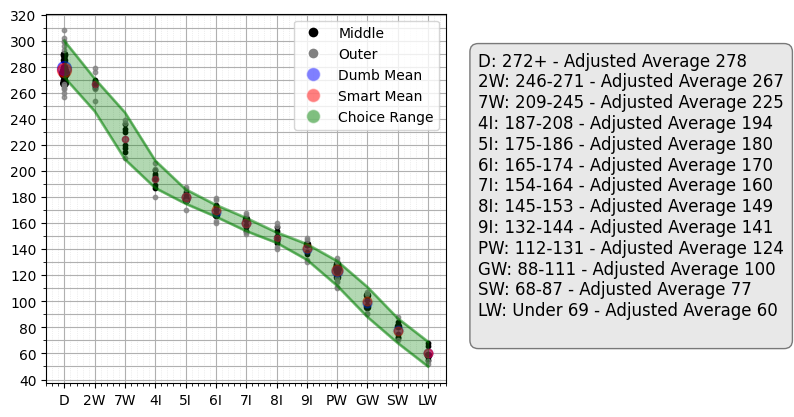

In [49]:
# Visualizations

import matplotlib.pyplot

dot_scalar = 10
distance_cap = 300
chip_threshold = 50
major_label = 20
minor_tick = 10

def get_frequencies(values):
    frequencies = {}
    for value in values:
        if value in frequencies:
            frequencies[value] += 1
        else:
            frequencies[value] = 1
    return list(frequencies.items())

def midpoint(a, b):
    return (a + b) // 2  # Integer midpoint

def generate_gap_ranges(data):
    # Sort by smart mean descending
    sorted_data = sorted(data, key=lambda x: x[1], reverse=True)
    clubs = [club for club, _, _ in sorted_data]
    means = [smart for _, smart, _ in sorted_data]

    ranges = []

    # Calculate midpoints between adjacent smart means
    midpoints = [midpoint(means[i], means[i + 1]) for i in range(len(means) - 1)]

    for i, club in enumerate(clubs):
        if i == 0:
            # Top club
            range_str = f"{midpoints[0]}+"
        elif i == len(clubs) - 1:
            # Bottom club
            range_str = f"Under {midpoints[-1] + 1}"
        else:
            lower = midpoints[i]
            upper = midpoints[i - 1] - 1
            range_str = f"{lower}-{upper}"

        ranges.append((club, range_str))
    
    return ranges

fig, ax = matplotlib.pyplot.subplots()
ax.grid(True, which = 'both')
ax.set_axisbelow(True)
# Turn on minor ticks
ax.minorticks_on()
ax.yaxis.set_minor_locator(MultipleLocator(minor_tick))
ax.yaxis.set_major_locator(MultipleLocator(major_label))

# Optional: display a subtle grid for minor ticks
ax.grid(which='minor', axis='x', linestyle=':', linewidth=0.5, color='gray', alpha=0.25)

summaries = []

for club in bag:
    cursor.execute(find_club_data, (club, course, start_date, end_date))
    rows = cursor.fetchall() # 0 club_abbreviation, 1 distance, 2 course, 3 shot_date, 4 hole, 5 strike_type, 6 path_type, 7 contact_type, 8 lie_type

    if rows:

        distances = [row[1] for row in rows]
        start_idx = int(len(distances) * 0.20)
        end_idx = int(len(distances) * 0.80)
        middle_distances = distances[start_idx:end_idx]
        set1 = set(distances)
        set2 = set(middle_distances)
        outside_distances = list(set1.symmetric_difference(set2))

        middle_frequency_data = get_frequencies(middle_distances)
        outside_frequency_data = get_frequencies(outside_distances)

        size_cap = 1
        #inside
        for distance, count in middle_frequency_data:
            ax.scatter(club, distance, s = count*dot_scalar, color = 'black')
            if count > size_cap: size_cap = count
        #outside
        for distance, count in outside_frequency_data:
            ax.scatter(club, distance, s = count*dot_scalar, color = 'gray', alpha=0.75)
            if count > size_cap: size_cap = count
        #dumb mean
        dumb = sum(distances)//len(distances)
        ax.scatter(club, dumb, s=(size_cap * 2 )*dot_scalar, color = 'blue', alpha = 0.5)
        #smart mean
        smart = sum(middle_distances)//len(middle_distances)
        ax.scatter(club, smart, s=(size_cap * 2 )*dot_scalar, color = 'red', alpha = 0.5)
        summaries.append((club, smart, dumb))

# Manual legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label=f'Middle', markerfacecolor='black', markersize=8),
    Line2D([0], [0], marker='o', color='w', label=f'Outer', markerfacecolor='gray', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Dumb Mean', markerfacecolor='blue', markersize=10, alpha=0.5),
    Line2D([0], [0], marker='o', color='w', label='Smart Mean', markerfacecolor='red', markersize=10, alpha=0.5),
    Line2D([0], [0], marker='o', color='w', label='Choice Range', markerfacecolor='green', markersize=10, alpha=0.5),
]

ax.legend(handles=legend_elements, loc='upper right')

matplotlib.pyplot.subplots_adjust(right=0.75)

ranges = generate_gap_ranges(summaries)

summary_string = ''
for i, summary in enumerate(summaries):
    summary_string += f'{summary[0]}: {ranges[i][1]} - Adjusted Average {summary[1]}\n'

_ = fig.text(
    0.80, 0.5,  # x and y position in figure coords (0=left, 1=right; 0=bottom,1=top)
    summary_string,
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.5),
    va='center'  # vertical alignment center
)


# trying to draw range lines to see if they make sense
ranges_split = []
for i, gap in enumerate(ranges):
    if i == 0:
        ranges_split.append((gap[0], int(gap[1].split('+')[0]), distance_cap))
    elif i == len(ranges) - 1:
        ranges_split.append((gap[0], chip_threshold, int(gap[1].split(' ')[1])))
    else:
        split = gap[1].split('-')
        ranges_split.append((gap[0], int(split[0]), int(split[1])))


ax.plot([x[0] for x in ranges_split], [y[1] for y in ranges_split], color='green', linestyle='-', linewidth=2, alpha = 0.3)
ax.plot([x[0] for x in ranges_split], [y[2] for y in ranges_split], color='green', linestyle='-', linewidth=2, alpha = 0.3)
# Prepare numeric x-values
x_values = list(range(len(ranges_split)))  # [0, 1, 2, ..., N]
lower_bounds = [entry[1] for entry in ranges_split]
upper_bounds = [entry[2] for entry in ranges_split]

# Plot the lines (optional)
ax.plot(x_values, upper_bounds, color='green', linestyle='-', linewidth=2, alpha=0.25)
ax.plot(x_values, lower_bounds, color='green', linestyle='-', linewidth=2, alpha=0.25)

# Fill between them
ax.fill_between(x_values, lower_bounds, upper_bounds, color='green', alpha=0.3)

_ = None

In [46]:
# Sample data

import sqlite3

# Connect to your database
conn = sqlite3.connect("golf.db")
cursor = conn.cursor()

import random
from datetime import datetime, timedelta

bag = ["D", "2W", "7W", "4I", "5I", "6I", "7I", "8I", "9I", "PW", "GW", "SW", "LW"]

base_date = datetime(2025, 5, 20)
sample_shots = []

# Typical approximate distance ranges by club (yards)
distance_ranges = {
    "D": (260, 310),
    "2W": (240, 280),
    "7W": (210, 240),
    "4I": (180, 210),
    "5I": (170, 190),
    "6I": (160, 180),
    "7I": (150, 170),
    "8I": (140, 160),
    "9I": (130, 150),
    "PW": (110, 130),
    "GW": (90, 110),
    "SW": (70, 90),
    "LW": (50, 70),
}

# Shot quality options
direction_options = ["PURE", "PUSH", "PULL"]
curve_options = ["PURE", "HOOK", "SLICE"]
contact_options = ["PURE", "THIN", "FAT"]
lie_options = ["TEE", "FAIRWAY", "ROUGH"]

for club in bag:
    for i in range(25):  # 25 shots per club
        dist_low, dist_high = distance_ranges.get(club, (100, 130))
        distance = random.randint(dist_low, dist_high)
        date = base_date + timedelta(days=i)
        hole = (i % 18) + 1
        direction = random.choice(direction_options)
        curve = random.choice(curve_options)
        contact = random.choice(contact_options)
        lie = random.choice(lie_options)

        shot = (club, distance, "TEST COURSE", date.strftime("%Y-%m-%d"), hole, direction, curve, contact, lie)
        sample_shots.append(shot)

# sample_shots now contains ~325 entries, 25 per club

# Insert SQL
insert_stmt = '''
INSERT INTO shots (
    club_abbreviation,
    distance,
    course,
    shot_date,
    hole,
    strike_type,
    path_type,
    contact_type,
    lie_type
) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?);
'''

# Execute the insert
cursor.executemany(insert_stmt, sample_shots)
conn.commit()
print(f"{cursor.rowcount} test shots inserted.")

325 test shots inserted.
